In [2]:
##importing necessary libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import plotly.express as px
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing the data

In [3]:
df = pd.read_csv("c:/Users/RATHIKA/oasis/Unemployment in India_oasis.csv")

In [4]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [5]:
df.describe(include=['object'])

Region         Date  Frequency   Area
count              740          740        740    740
unique              28           14          2      2
top     Andhra Pradesh   31-10-2019    Monthly  Urban
freq                28           55        381    381

<AxesSubplot:>

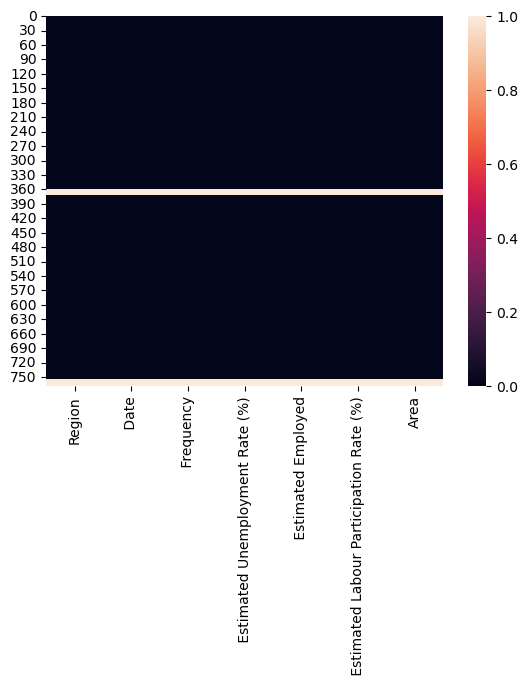

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
region_frq = df['Region'].value_counts()
region_frq

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [11]:
df.describe()


Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [12]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'],errors='coerce')
df['Estimated Employed'] = pd.to_numeric(df['Estimated Employed'],errors='coerce')


In [14]:
upper_limit1=df["Estimated Unemployment Rate (%)"].mean() + 3*df["Estimated Unemployment Rate (%)"].std()
lower_limit2=df["Estimated Unemployment Rate (%)"].mean() - 3*df["Estimated Unemployment Rate (%)"].std()
upper_limit3=df["Estimated Employed"].mean() + 3*df["Estimated Employed"].std()
lower_limit4=df["Estimated Employed"].mean() - 3*df["Estimated Employed"].std()
upper_limit5=df["Estimated Labour Participation Rate (%)"].mean() + 3*df["Estimated Labour Participation Rate (%)"].std()
lower_limit6=df["Estimated Labour Participation Rate (%)"].mean() - 3*df["Estimated Labour Participation Rate (%)"].std()
print("upper limit1: ",upper_limit1)
print("lower limit2: ",lower_limit2)
print("upper limit3: ",upper_limit3)
print("lower limit4: ",lower_limit4)
print("upper limit5: ",upper_limit5)
print("lower limit6: ",lower_limit6)

upper limit1:  43.9518410654193
lower limit2:  -20.375949173527403
upper limit3:  31468425.314049035
lower limit4:  -17059505.26269768
upper limit5:  66.9634047192192
lower limit6:  18.29683852402397


In [15]:
#find the outliers
outliers_df=df.loc[(df["Estimated Unemployment Rate (%)"]> upper_limit1) |(df["Estimated Unemployment Rate (%)"] < lower_limit2)]
outliers_df=df.loc[(df["Estimated Employed"]> upper_limit3) |(df["Estimated Employed"] < lower_limit4)]
outliers_df=df.loc[(df["Estimated Labour Participation Rate (%)"]> upper_limit5) |(df["Estimated Labour Participation Rate (%)"] < lower_limit6)]
outliers_df.shape

(14, 7)

In [16]:
#remove outliers from the data
new_df =df.loc[(df["Estimated Unemployment Rate (%)"]< upper_limit1) & (df["Estimated Unemployment Rate (%)"] > lower_limit2)]
new_df =df.loc[(df["Estimated Employed"]< upper_limit3) & (df["Estimated Employed"] > lower_limit4)]
new_df =df.loc[(df["Estimated Labour Participation Rate (%)"]< upper_limit5) & (df["Estimated Labour Participation Rate (%)"] > lower_limit6)]
print("the outliers: ",len(df)-len(new_df))

the outliers:  14


In [17]:
output_file = "Unemployment before and after covid19.csv"
new_df.to_csv(output_file,index=False)

In [18]:
new = pd.read_csv("Unemployment before and after covid19.csv")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   726 non-null    object 
 1   Date                                     726 non-null    object 
 2   Frequency                                726 non-null    object 
 3   Estimated Unemployment Rate (%)          726 non-null    float64
 4   Estimated Employed                       726 non-null    float64
 5   Estimated Labour Participation Rate (%)  726 non-null    float64
 6   Area                                     726 non-null    object 
dtypes: float64(3), object(4)
memory usage: 39.8+ KB


In [19]:

new.drop(['Frequency'], axis=1, inplace = True)
new



Region         Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019                             3.65   
1    Andhra Pradesh   30-06-2019                             3.05   
2    Andhra Pradesh   31-07-2019                             3.75   
3    Andhra Pradesh   31-08-2019                             3.32   
4    Andhra Pradesh   30-09-2019                             5.17   
..              ...          ...                              ...   
721     West Bengal   29-02-2020                             7.55   
722     West Bengal   31-03-2020                             6.67   
723     West Bengal   30-04-2020                            15.63   
724     West Bengal   31-05-2020                            15.22   
725     West Bengal   30-06-2020                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                                    43.24  Rural  
1            11755881.0                                    42.05  Rural  
2            12086707.0                                    43.50  Rural  
3            12285693.0                                    43.97  Rural  
4            12256762.0                                    44.68  Rural  
..                  ...                                      ...    ...  
721          10871168.0                                    44.09  Urban  
722          10806105.0                                    43.34  Urban  
723           9299466.0                                    41.20  Urban  
724           9240903.0                                    40.67  Urban  
725           9088931.0                                    37.57  Urban  

[726 rows x 6 columns]

In [20]:
Area_frq = df['Area'].value_counts()
Area_frq

Urban    381
Rural    359
Name: Area, dtype: int64

([<matplotlib.patches.Wedge at 0x1895aa45490>,
 [Text(-0.051350606033972866, 1.0988007623131428, 'Urban'),
  Text(0.051350606033972734, -1.0988007623131428, 'Rural')],
 [Text(-0.02800942147307611, 0.5993458703526233, '51%'),
  Text(0.028009421473076033, -0.5993458703526233, '49%')])

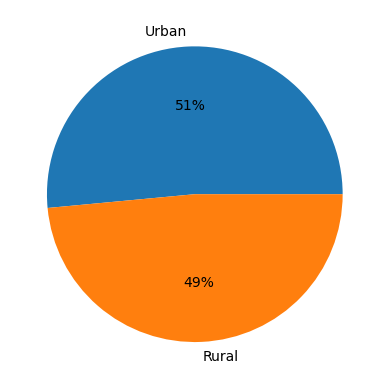

In [21]:
plt.pie(Area_frq,labels=Area_frq.keys(),autopct='%.0f%%')

In [22]:

result =new.loc[new.groupby('Region')['Estimated Unemployment Rate (%)'].idxmax()]
result = result.sort_values(by=['Area','Estimated Unemployment Rate (%)'])

result

Region         Date  Estimated Unemployment Rate (%)  \
345       West Bengal   31-05-2020                            18.43   
224            Odisha   30-04-2020                            24.48   
199       Maharashtra   30-04-2020                            25.28   
158         Karnataka   30-04-2020                            33.17   
251            Punjab   31-05-2020                            40.59   
303           Tripura   30-04-2020                            43.64   
283        Tamil Nadu   30-04-2020                            53.19   
366             Assam   31-10-2019                            11.17   
710       Uttarakhand   31-05-2020                            17.36   
574         Meghalaya   30-04-2020                            17.39   
640            Sikkim   31-03-2020                            20.45   
395        Chandigarh   30-11-2019                            22.05   
486   Jammu & Kashmir   31-10-2019                            24.06   
435               Goa   30-11-2019                            25.20   
452           Gujarat   30-04-2020                            25.94   
414      Chhattisgarh   30-06-2020                            27.07   
533            Kerala   31-05-2020                            30.28   
696     Uttar Pradesh   31-05-2020                            32.06   
358    Andhra Pradesh   30-04-2020                            32.30   
629         Rajasthan   30-04-2020                            35.53   
670         Telangana   31-05-2020                            36.57   
547    Madhya Pradesh   31-05-2020                            40.49   
427             Delhi   31-05-2020                            45.78   
466           Haryana   30-04-2020                            46.89   
481  Himachal Pradesh   31-05-2020                            50.00   
386             Bihar   30-04-2020                            58.77   
505         Jharkhand   31-05-2020                            70.17   
601        Puducherry   30-04-2020                            76.74   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
345          19115772.0                                    42.53  Rural  
224           5562449.0                                    25.16  Rural  
199          15014802.0                                    37.42  Rural  
158           9330400.0                                    43.25  Rural  
251           3727366.0                                    41.14  Rural  
303            675083.0                                    52.63  Rural  
283           5086200.0                                    33.05  Rural  
366           1595176.0                                    44.01  Urban  
710            778590.0                                    32.27  Urban  
574            161939.0                                    36.51  Urban  
640             86186.0                                    50.57  Urban  
395            289593.0                                    38.60  Urban  
486           1029087.0                                    42.63  Urban  
435            271612.0                                    45.22  Urban  
452           6701284.0                                    36.33  Urban  
414           1602231.0                                    39.41  Urban  
533           2826118.0                                    29.95  Urban  
696          11111486.0                                    41.10  Urban  
358           2544084.0                                    26.97  Urban  
629           2932923.0                                    29.57  Urban  
670           3108830.0                                    37.63  Urban  
547           3879934.0                                    35.49  Urban  
427           2343783.0                                    28.28  Urban  
466           1606580.0                                    35.48  Urban  
481            134868.0                                    43.55  Urban  
386           1400962.0        

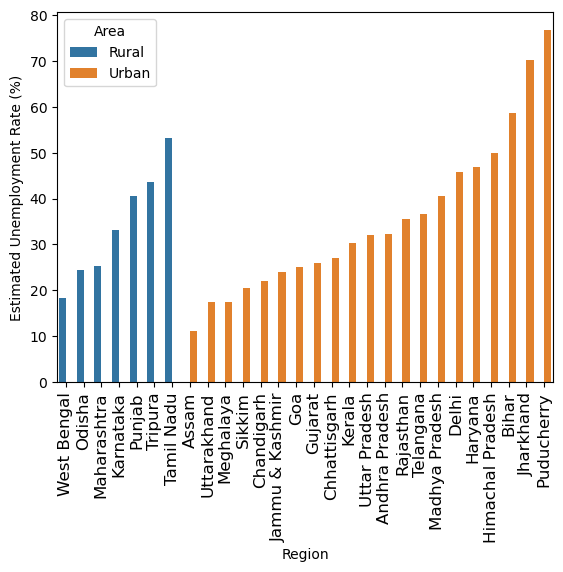

In [23]:
ax = sns.barplot(x='Region',y='Estimated Unemployment Rate (%)',hue = 'Area', data=result)
ax.tick_params(axis='x', rotation=90, labelsize=12)
plt.show()

## By looking the above graph the following are found:
# Pondicherry Urban area has the maximum Unemployment Rate and Assam Urban area has the lowest Unemployment rate 
# Westbengal rural area has the minimum Unemployment Rate and Tamilnadu rural has highest Unemployment rate

# Univariate analysis

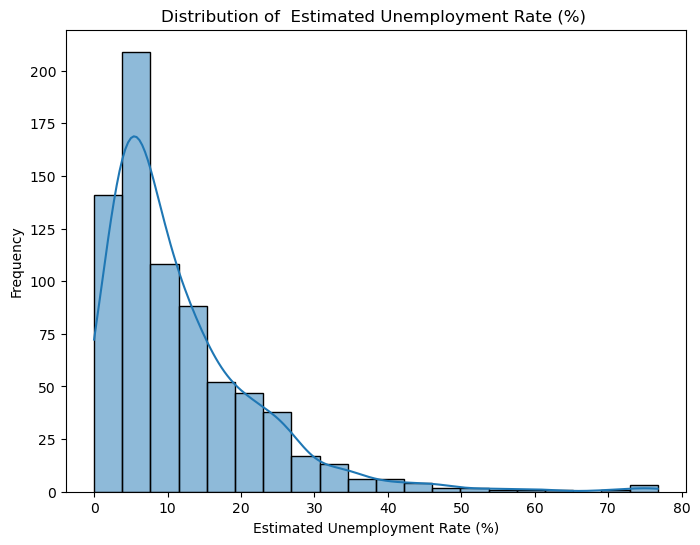

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of  Estimated Unemployment Rate (%) ')
plt.show()

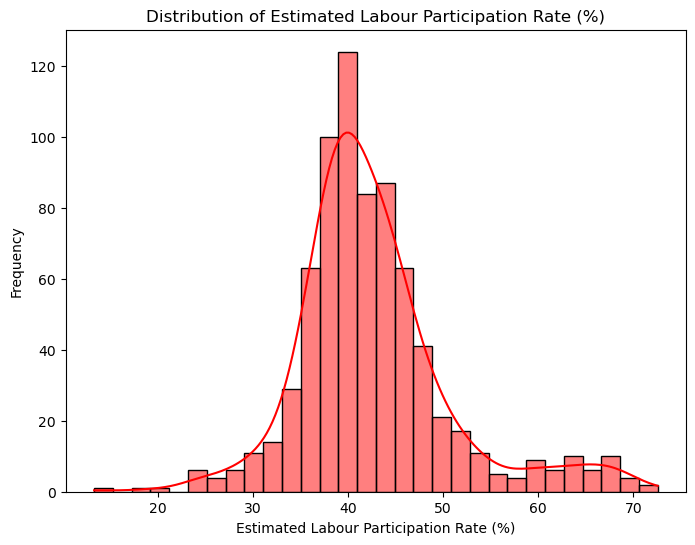

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Estimated Labour Participation Rate (%)'],kde=True,bins=30,color='red')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.show()

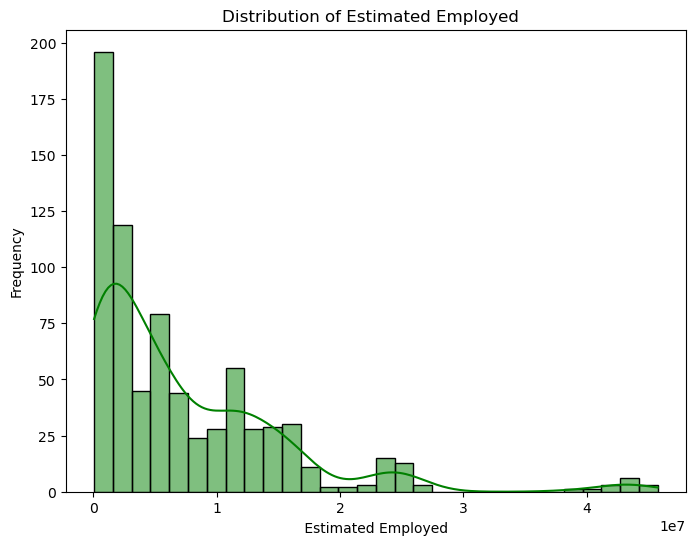

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(df['Estimated Employed'],kde=True,bins=30,color='green')
plt.xlabel(' Estimated Employed ')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Employed  ')
plt.show()

In [27]:
Urban = df[df['Area']=='Urban']
Rural = df[df['Area']=='Rural']
Urban,Rural

(             Region         Date Frequency  Estimated Unemployment Rate (%)  \
 373  Andhra Pradesh   31-05-2019   Monthly                             6.09   
 374  Andhra Pradesh   30-06-2019   Monthly                             3.80   
 375  Andhra Pradesh   31-07-2019   Monthly                             5.64   
 376  Andhra Pradesh   31-08-2019   Monthly                             4.61   
 377  Andhra Pradesh   30-09-2019   Monthly                             6.01   
 ..              ...          ...       ...                              ...   
 749     West Bengal   29-02-2020   Monthly                             7.55   
 750     West Bengal   31-03-2020   Monthly                             6.67   
 751     West Bengal   30-04-2020   Monthly                            15.63   
 752     West Bengal   31-05-2020   Monthly                            15.22   
 753     West Bengal   30-06-2020   Monthly                             9.86   
 
      Estimated Employed  Estimated La

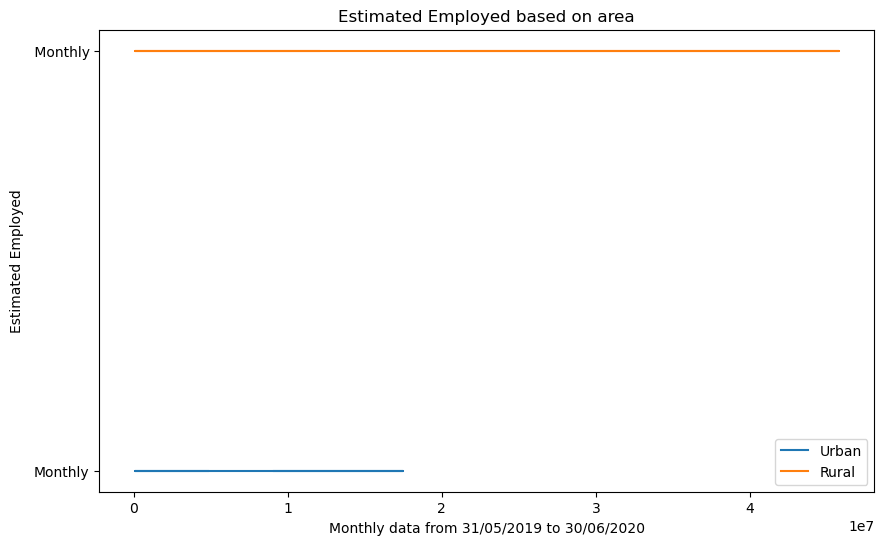

In [28]:
plt.figure(figsize = (10,6))
plt.plot(Urban['Estimated Employed'],Urban['Frequency'],label = 'Urban')
plt.plot(Rural['Estimated Employed'],Rural['Frequency'],label='Rural')
plt.xlabel('Monthly data from 31/05/2019 to 30/06/2020')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed based on area')
plt.legend()
plt.show()

# From the above graph, the rural area has more estimated employed than urban

In [29]:
grouped = new.groupby('Region').agg({'Estimated Unemployment Rate (%)': 'mean', 'Estimated Employed': 'mean','Estimated Labour Participation Rate (%)':'mean'}).reset_index()
grouped

Region  Estimated Unemployment Rate (%)  Estimated Employed  \
0     Andhra Pradesh                         7.477143        8.154093e+06   
1              Assam                         6.428077        5.354772e+06   
2              Bihar                        18.918214        1.236619e+07   
3         Chandigarh                        15.991667        3.168312e+05   
4       Chhattisgarh                         9.240357        4.303499e+06   
5              Delhi                        16.495357        2.627513e+06   
6                Goa                         9.274167        2.263083e+05   
7            Gujarat                         6.663929        1.140201e+07   
8            Haryana                        26.283214        3.557072e+06   
9   Himachal Pradesh                        18.540357        1.059824e+06   
10   Jammu & Kashmir                        16.188571        1.799932e+06   
11         Jharkhand                        20.585000        4.469240e+06   
12         Karnataka                         6.676071        1.066712e+07   
13            Kerala                        10.102222        4.524852e+06   
14    Madhya Pradesh                         7.406429        1.111548e+07   
15       Maharashtra                         7.557500        1.999020e+07   
16         Meghalaya                         5.242500        6.247987e+05   
17            Odisha                         5.657857        6.545747e+06   
18        Puducherry                        10.215000        2.122781e+05   
19            Punjab                        12.031071        4.539362e+06   
20         Rajasthan                        14.058214        1.004106e+07   
21            Sikkim                         7.249412        1.068807e+05   
22        Tamil Nadu                         9.284286        1.226955e+07   
23         Telangana                         8.020800        7.423194e+06   
24           Tripura                        27.658571        6.520832e+05   
25     Uttar Pradesh                        12.551429        2.809483e+07   
26       Uttarakhand                         6.582963        1.390228e+06   
27       West Bengal                         8.124643        1.719854e+07   

    Estimated Labour Participation Rate (%)  
0                                 39.375714  
1                                 44.868462  
2                                 38.153929  
3                                 39.336667  
4                                 42.810714  
5                                 38.929643  
6                                 39.249583  
7                                 46.101071  
8                                 42.737143  
9                                 44.222143  
10                                41.030952  
11                                41.670714  
12                                41.345357  
13                                35.665556  
14                                38.821429  
15                                42.303214  
16                                55.626250  
17                                38.926429  
18                                38.992692  
19                                41.138214  
20                                39.973214  
21                                46.070000  
22                                40.872143  
23                                50.978400  
24                                59.377619  
25                                39.432500  
26                                33.775556  
27                                45.417500

In [30]:
fig = px.bar(grouped,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Average unemployment rate(regionwise)')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

# From the above bar chart , On an average Meghalaya has the lowest and Tirpura has the highest unemployment rate (%)

In [31]:
from matplotlib.ticker import FuncFormatter

In [32]:
def million_formatter(x,pos):
    return f'{x:2f}M'

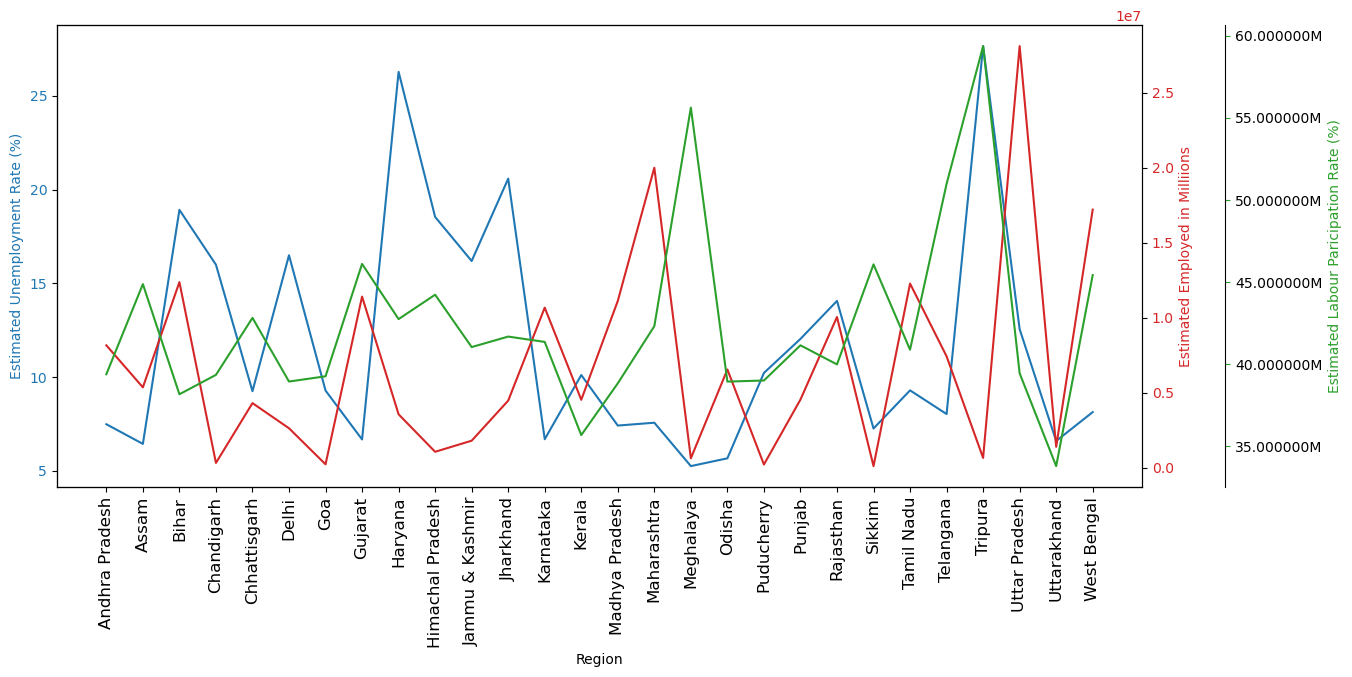

In [33]:
fig,ax1 = plt.subplots(figsize=(14, 6))
x=grouped['Region']
y1=grouped['Estimated Unemployment Rate (%)']
y2=grouped['Estimated Employed']
y3=grouped['Estimated Labour Participation Rate (%)']

ax1.plot(x,[float(y) for y in y1],label='Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.set_xlabel('Region')
ax1.set_ylabel('Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Employed',color = 'tab:red')
ax2.set_ylabel('Estimated Employed in Milliions',color ='tab:red')
ax2.tick_params(axis='y', labelcolor = 'tab:red')


ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward',60))
ax3.plot(x,[float(y) for y in y3],label = 'Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.set_ylabel('Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.tick_params(axis = 'y',color='tab:green')
ax3.yaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.show()

In [34]:
## From the above graph,the following observations are made:
#1. Uttarakhand has the lowest unemployment rate 
#2. In Tirupura the labour participation rate and Unemployment rate is same which means the labours who are all participated got nil chance of getting employed. thats why the employed rate is low also
#3. The West bengal region the labour participation is low compared to estimated employed which means all the labour particiated in job market has got employment thats why the unemployment rate is less.
#4. The unemployment rate 2nd highest is Haryana Region.
#5. The estimated employed rate is high in Uttar pradesh compared to other regions.


In [35]:
new['Date'] =new['Date'].str.replace('-','-').str.strip()
new['Date']

0      31-05-2019
1      30-06-2019
2      31-07-2019
3      31-08-2019
4      30-09-2019
          ...    
721    29-02-2020
722    31-03-2020
723    30-04-2020
724    31-05-2020
725    30-06-2020
Name: Date, Length: 726, dtype: object

In [36]:
new['Date']=pd.to_datetime(new['Date'],format='%d-%m-%Y',errors='coerce')
new['Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
721   2020-02-29
722   2020-03-31
723   2020-04-30
724   2020-05-31
725   2020-06-30
Name: Date, Length: 726, dtype: datetime64[ns]

In [37]:
covid_start_date = '2020-03-01'
covid_start_date

'2020-03-01'

In [38]:
data_before_covid=new[new['Date']< covid_start_date]
data_after_covid = new[new['Date']>=covid_start_date]


In [39]:
grouped_before_covid = data_before_covid.groupby('Region').agg({'Estimated Unemployment Rate (%)': 'mean', 'Estimated Employed': 'mean','Estimated Labour Participation Rate (%)':'mean'}).reset_index()
grouped_after_covid = data_after_covid.groupby('Region').agg({'Estimated Unemployment Rate (%)': 'mean', 'Estimated Employed': 'mean','Estimated Labour Participation Rate (%)':'mean'}).reset_index()


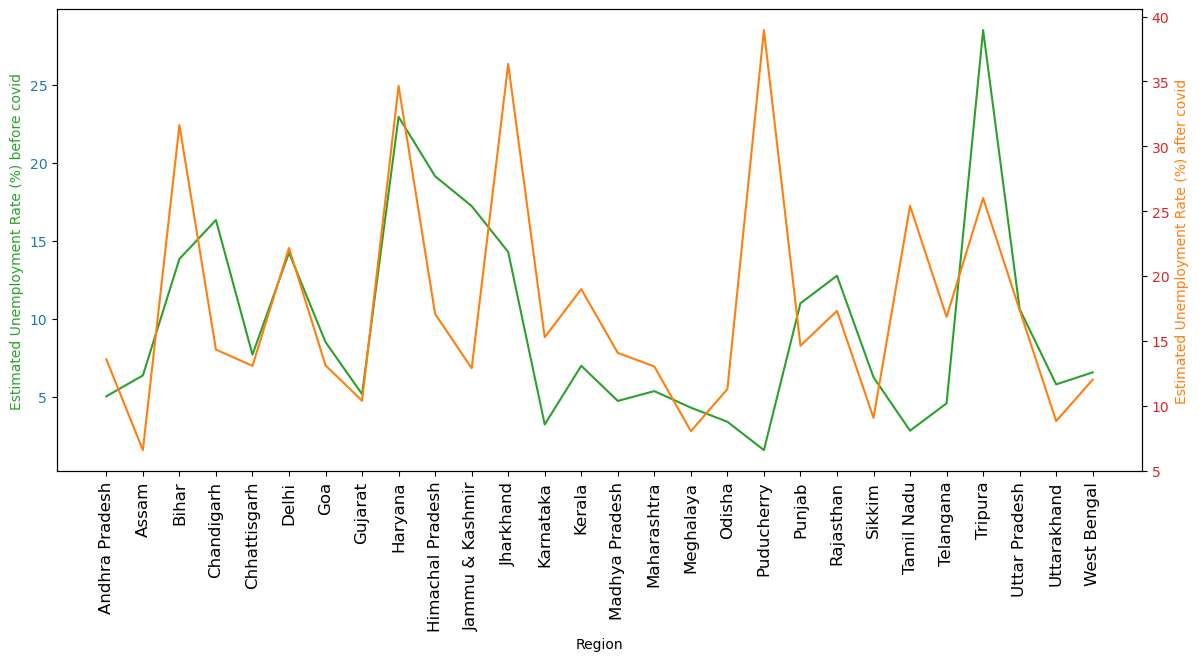

In [40]:
fig,ax1 = plt.subplots(figsize=(14, 6))

y1=grouped_before_covid['Estimated Unemployment Rate (%)']
y2=grouped_after_covid['Estimated Unemployment Rate (%)']


ax1.plot(x,[float(y) for y in y1],label='Estimated Unemployment Rate (%)',color ='tab:green')
ax1.set_xlabel('Region')
ax1.set_ylabel('Estimated Unemployment Rate (%) before covid',color ='tab:green')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Unemployment Rate (%)',color = 'tab:orange')
ax2.set_ylabel('Estimated Unemployment Rate (%) after covid',color ='tab:orange')
ax2.tick_params(axis='y', labelcolor = 'tab:red')


plt.show()


# From the above graph following observations are made:
Assam, Chandigarh, Haryana,Himachal Pradesh,Jammu & Kashmir,Meghalaya, Punjab,Rajastan, Sikkim,Uttarkhand regions have low unemployment rate (%) after covid.Actually the unemployment rate in (%) has reduced considarbily in these regions 

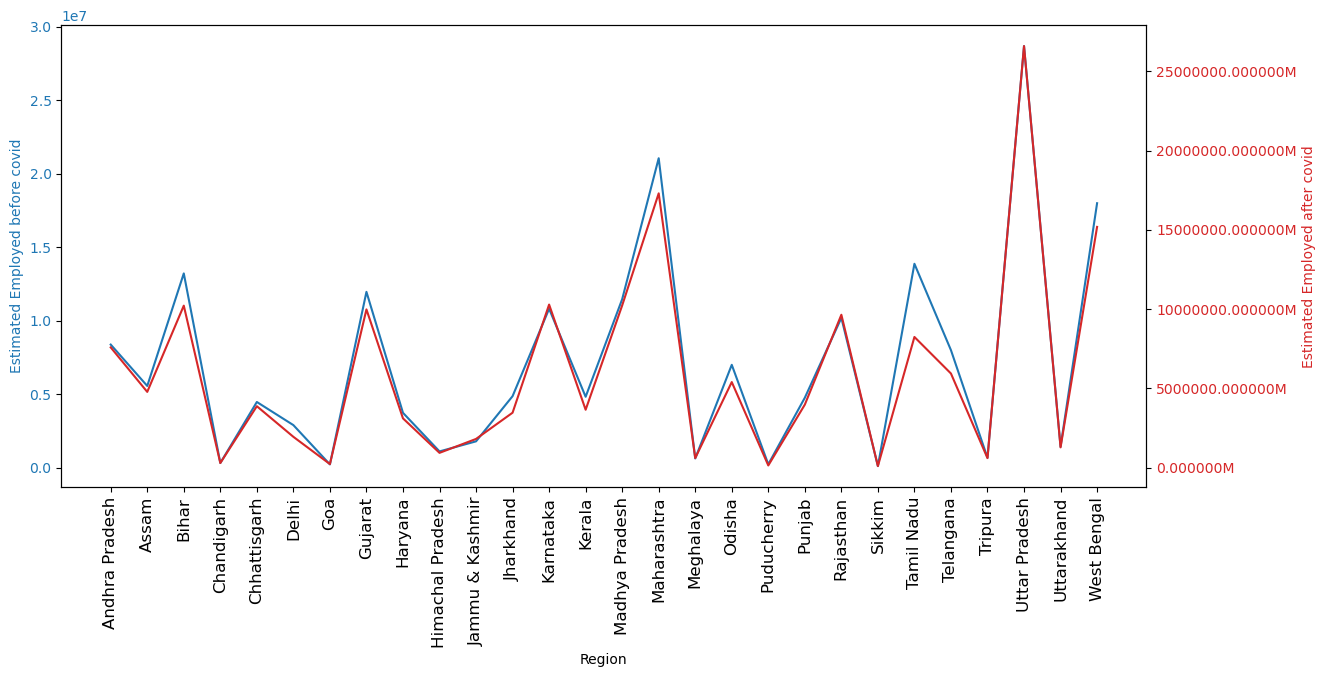

In [41]:
fig,ax1 = plt.subplots(figsize=(14, 6))

y1=grouped_before_covid['Estimated Employed']
y2=grouped_after_covid['Estimated Employed']


ax1.plot(x,[float(y) for y in y1],label='Estimated Employed',color ='tab:blue')
ax1.set_xlabel('Region')
ax1.set_ylabel('Estimated Employed before covid',color ='tab:blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Employed',color = 'tab:red')
ax2.set_ylabel('Estimated Employed after covid',color ='tab:red')
ax2.tick_params(axis='y', labelcolor = 'tab:red')
ax2.yaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.show()


# From the above graph, Tamilnadu region the estmated employed after covid is reduced than estimated employed before covid. More number of persons those who lost their jobs at covid time, cannot get back their jobs after covid.

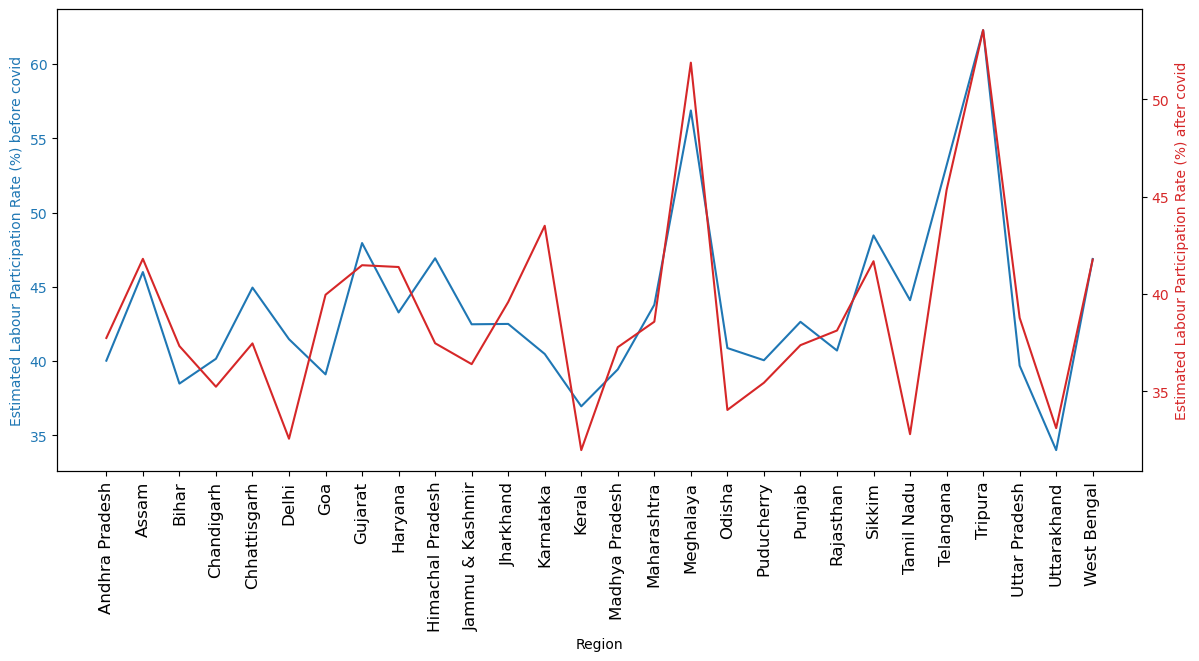

In [42]:
fig,ax1 = plt.subplots(figsize=(14, 6))

y1=grouped_before_covid['Estimated Labour Participation Rate (%)']
y2=grouped_after_covid['Estimated Labour Participation Rate (%)']


ax1.plot(x,[float(y) for y in y1],label='Estimated Labour Participation Rate (%)',color ='tab:blue')
ax1.set_xlabel('Region')
ax1.set_ylabel('Estimated Labour Participation Rate (%) before covid',color ='tab:blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Employed',color = 'tab:red')
ax2.set_ylabel('Estimated Labour Participation Rate (%) after covid',color ='tab:red')
ax2.tick_params(axis='y', labelcolor = 'tab:red')


plt.show()

# From this graph  the Estimated Labour participation in Tamilnadu has reduced after covid. Hence the above point is proved from this graph also.

In [43]:
data = pd.read_csv("c:/Users/RATHIKA/oasis/Unemployment_Rate_upto_11_2020_oasis.csv")

In [44]:
data.head()

State         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region  \
0             16635535                                     41.02  South   
1             16545652                                     40.90  South   
2             15881197                                     39.18  South   
3             11336911                                     33.10  South   
4             12988845                                     36.46  South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [45]:
unemployment =data.groupby(['Region','State'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
unemployment.head()

Region        State   Estimated Unemployment Rate (%)
0   East        Bihar                            19.471
1   East    Jharkhand                            19.539
2   East       Odisha                             6.462
3   East  West Bengal                            10.192
4  North        Delhi                            18.414

In [46]:

data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region                                   267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [47]:
data['Estimated Unemployment Rate (%)'] = pd.to_numeric(data['Estimated Unemployment Rate (%)'],errors='coerce')
data['Estimated Employed'] = pd.to_numeric(data['Estimated Employed'],errors='coerce')


In [48]:
upper_limit1=data["Estimated Unemployment Rate (%)"].mean() + 3*data["Estimated Unemployment Rate (%)"].std()
lower_limit2=data["Estimated Unemployment Rate (%)"].mean() - 3*data["Estimated Unemployment Rate (%)"].std()
upper_limit3=data["Estimated Employed"].mean() + 3*data["Estimated Employed"].std()
lower_limit4=data["Estimated Employed"].mean() - 3*data["Estimated Employed"].std()
upper_limit5=data["Estimated Labour Participation Rate (%)"].mean() + 3*data["Estimated Labour Participation Rate (%)"].std()
lower_limit6=data["Estimated Labour Participation Rate (%)"].mean() - 3*data["Estimated Labour Participation Rate (%)"].std()
print("upper limit1: ",upper_limit1)
print("lower limit2: ",lower_limit2)
print("upper limit3: ",upper_limit3)
print("lower limit4: ",lower_limit4)
print("upper limit5: ",upper_limit5)
print("lower limit6: ",lower_limit6)

upper limit1:  44.64677899246251
lower limit2:  -20.172921314559893
upper limit3:  54061060.80204453
lower limit4:  -26136849.35635165
upper limit5:  65.21783142048992
lower limit6:  18.145314646925726


In [49]:
outliers_data=data.loc[(data["Estimated Unemployment Rate (%)"]> upper_limit1) |(data["Estimated Unemployment Rate (%)"] < lower_limit2)]
outliers_data=data.loc[(df["Estimated Employed"]> upper_limit3) |(data["Estimated Employed"] < lower_limit4)]
outliers_data=data.loc[(df["Estimated Labour Participation Rate (%)"]> upper_limit5) |(data["Estimated Labour Participation Rate (%)"] < lower_limit6)]
outliers_data.shape

(7, 9)

In [50]:
new_data =data.loc[(data["Estimated Unemployment Rate (%)"]< upper_limit1) & (data["Estimated Unemployment Rate (%)"] > lower_limit2)]
new_data =data.loc[(data["Estimated Employed"]< upper_limit3) & (data["Estimated Employed"] > lower_limit4)]
new_data =data.loc[(data["Estimated Labour Participation Rate (%)"]< upper_limit5) & (data["Estimated Labour Participation Rate (%)"] > lower_limit6)]
print("the outliers: ",len(data)-len(new_data))

the outliers:  5


In [51]:
output_new = "Unemployment in 2020.csv"
new_data.to_csv(output_new,index=False)

In [52]:
new_data = pd.read_csv("Unemployment in 2020.csv")
new_data.head()

State         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020         M                             5.48   
1  Andhra Pradesh   29-02-2020         M                             5.83   
2  Andhra Pradesh   31-03-2020         M                             5.79   
3  Andhra Pradesh   30-04-2020         M                            20.51   
4  Andhra Pradesh   31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region  \
0            16635535                                    41.02  South   
1            16545652                                    40.90  South   
2            15881197                                    39.18  South   
3            11336911                                    33.10  South   
4            12988845                                    36.46  South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [53]:
new_data['Date']

0       31-01-2020
1       29-02-2020
2       31-03-2020
3       30-04-2020
4       31-05-2020
          ...     
257     30-06-2020
258     31-07-2020
259     31-08-2020
260     30-09-2020
261     31-10-2020
Name: Date, Length: 262, dtype: object

In [54]:
new_data['Date'] =new_data['Date'].str.replace('-','-').str.strip()

new_data['Date']=pd.to_datetime(new_data['Date'],format = '%d-%m-%Y',errors ='coerce')
new_data['Date']

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
257   2020-06-30
258   2020-07-31
259   2020-08-31
260   2020-09-30
261   2020-10-31
Name: Date, Length: 262, dtype: datetime64[ns]

In [55]:
new_data['month']=new_data['Date'].dt.strftime('%b')
print(new_data['month'])

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
257    Jun
258    Jul
259    Aug
260    Sep
261    Oct
Name: month, Length: 262, dtype: object


In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    262 non-null    object        
 1   Date                                     262 non-null    datetime64[ns]
 2   Frequency                                262 non-null    object        
 3   Estimated Unemployment Rate (%)          262 non-null    float64       
 4   Estimated Employed                       262 non-null    int64         
 5   Estimated Labour Participation Rate (%)  262 non-null    float64       
 6   Region                                   262 non-null    object        
 7   longitude                                262 non-null    float64       
 8   latitude                                 262 non-null    float64       
 9   month                                    26

In [57]:
fig=px.scatter_geo(new_data,'longitude','latitude',color='State',
                  hover_name='State',size='Estimated Unemployment Rate (%)',
                  animation_frame='month',scope='asia',title=' Unemployment in Jan-2020 to Oct-2020 in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

In [58]:
grouped = new_data.groupby('Region').agg({'Estimated Unemployment Rate (%)': 'mean', 'Estimated Employed': 'mean','Estimated Labour Participation Rate (%)':'mean'}).reset_index()
grouped

Region  Estimated Unemployment Rate (%)  Estimated Employed  \
0       East                        13.916000        1.960237e+07   
1      North                        15.889620        1.307249e+07   
2  Northeast                         9.512647        3.863379e+06   
3      South                        10.343898        1.421190e+07   
4       West                         8.239000        1.862351e+07   

   Estimated Labour Participation Rate (%)  
0                                40.108750  
1                                38.702658  
2                                50.214412  
3                                40.837288  
4                                41.257000

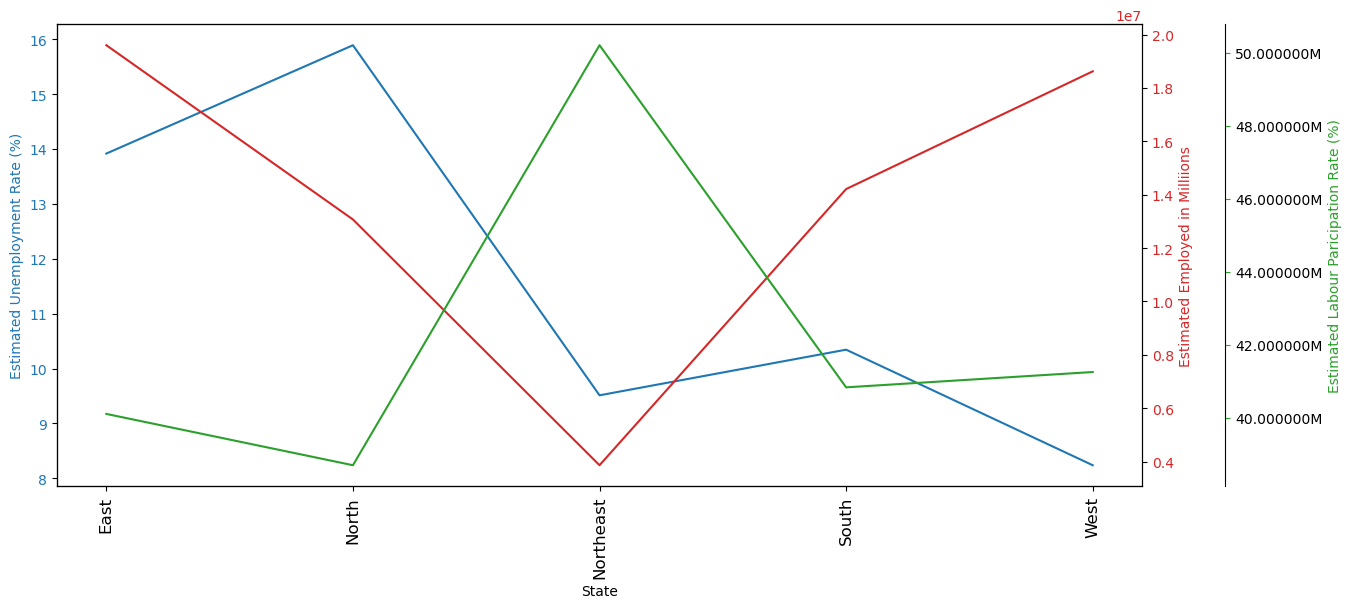

In [59]:
fig,ax1 = plt.subplots(figsize=(14, 6))
x=grouped['Region']
y1=grouped['Estimated Unemployment Rate (%)']
y2=grouped['Estimated Employed']
y3=grouped['Estimated Labour Participation Rate (%)']

ax1.plot(x,[float(y) for y in y1],label='Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.set_xlabel('State')
ax1.set_ylabel('Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Employed',color = 'tab:red')
ax2.set_ylabel('Estimated Employed in Milliions',color ='tab:red')
ax2.tick_params(axis='y', labelcolor = 'tab:red')


ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward',60))
ax3.plot(x,[float(y) for y in y3],label = 'Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.set_ylabel('Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.tick_params(axis = 'y',color='tab:green')
ax3.yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.show()

In [60]:
# The West region has low estimated unemployment rate from Jan-2020 to Oct-2020

In [61]:
grouped1 = new_data.groupby('State').agg({'Estimated Unemployment Rate (%)': 'mean', 'Estimated Employed': 'mean','Estimated Labour Participation Rate (%)':'mean'}).reset_index()
grouped1

State  Estimated Unemployment Rate (%)  Estimated Employed  \
0     Andhra Pradesh                         8.664000        1.542548e+07   
1              Assam                         4.856000        1.081028e+07   
2              Bihar                        19.471000        2.360683e+07   
3       Chhattisgarh                         7.819000        8.421349e+06   
4              Delhi                        18.414000        4.632822e+06   
5                Goa                        12.167000        4.423748e+05   
6            Gujarat                         6.376000        2.273075e+07   
7            Haryana                        27.477000        6.844059e+06   
8   Himachal Pradesh                        16.065000        2.033885e+06   
9    Jammu & Kashmir                        16.477778        3.310032e+06   
10         Jharkhand                        19.539000        8.770642e+06   
11         Karnataka                         7.668000        2.162402e+07   
12            Kerala                         8.594444        9.114964e+06   
13    Madhya Pradesh                         6.854000        2.231834e+07   
14       Maharashtra                         7.979000        3.920476e+07   
15         Meghalaya                         4.111111        1.334118e+06   
16            Odisha                         6.462000        1.272683e+07   
17        Puducherry                        17.942000        3.652629e+05   
18            Punjab                        11.981000        8.783034e+06   
19         Rajasthan                        15.868000        1.973175e+07   
20            Sikkim                         9.792500        2.345232e+05   
21        Tamil Nadu                        12.187000        2.198790e+07   
22         Telangana                         6.833000        1.624408e+07   
23           Tripura                        22.790000        1.338412e+06   
24     Uttar Pradesh                         9.737000        5.552480e+07   
25       Uttarakhand                        11.156000        2.743275e+06   
26       West Bengal                        10.192000        3.330516e+07   

    Estimated Labour Participation Rate (%)  
0                                 38.962000  
1                                 43.498000  
2                                 37.173000  
3                                 41.161000  
4                                 35.857000  
5                                 39.242000  
6                                 45.490000  
7                                 42.100000  
8                                 40.252000  
9                                 37.894444  
10                                40.356000  
11                                42.000000  
12                                35.227778  
13                                38.926000  
14                                41.466000  
15                                59.233333  
16                                37.748000  
17                                35.918000  
18                                39.979000  
19                                40.591000  
20                                45.756250  
21                                37.383000  
22                                54.972000  
23                                53.308571  
24                                37.608000  
25                                35.259000  
26                                45.158000

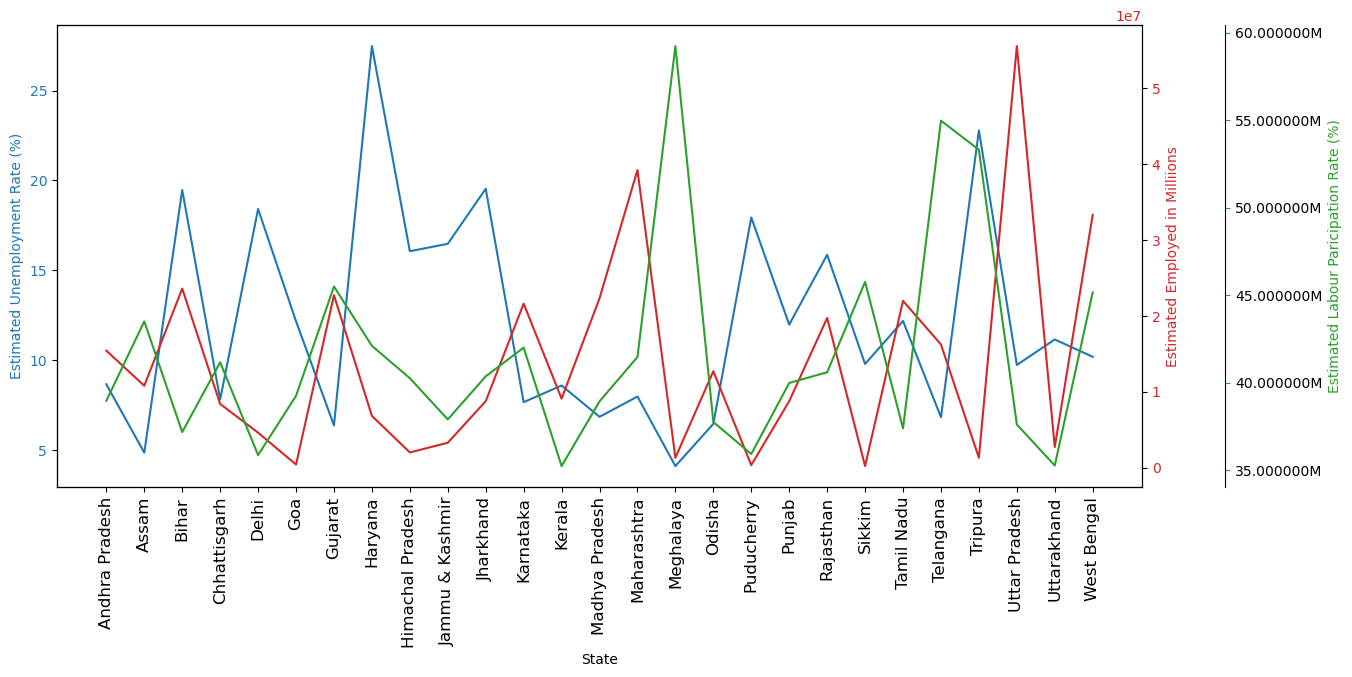

In [62]:
fig,ax1 = plt.subplots(figsize=(14, 6))
x=grouped1['State']
y1=grouped1['Estimated Unemployment Rate (%)']
y2=grouped1['Estimated Employed']
y3=grouped1['Estimated Labour Participation Rate (%)']

ax1.plot(x,[float(y) for y in y1],label='Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.set_xlabel('State')
ax1.set_ylabel('Estimated Unemployment Rate (%)',color ='tab:blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelcolor = 'tab:blue')

ax2=ax1.twinx()
ax2.plot(x,[float(y) for y in y2],label = 'Estimated Employed',color = 'tab:red')
ax2.set_ylabel('Estimated Employed in Milliions',color ='tab:red')
ax2.tick_params(axis='y', labelcolor = 'tab:red')


ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward',60))
ax3.plot(x,[float(y) for y in y3],label = 'Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.set_ylabel('Estimated Labour Paricipation Rate (%)',color='tab:green')
ax3.tick_params(axis = 'y',color='tab:green')
ax3.yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.show()

In [63]:
# The unemployment rate is the maximum in Haryana during Jan -2020 and Oct-2020
# Uttarpradesh has highest no.of estimated employed from Jan 2020 to Oct 2020
# The labour participation rate high in Megalaya during Jan 2020 to Oct 2020

In [64]:
unemployment =new_data.groupby(['Region','State'])['Estimated Unemployment Rate (%)'].mean().reset_index()

In [66]:
fig = px.sunburst(unemployment,path=['Region','State'],values='Estimated Unemployment Rate (%)',
                 title ='Unemployment rate in state and region',height=600)
fig.show()